Алгоритмы на графах
---

# Граф

**Графом** называют динамическую структуру данных, где каждый объект представлен в виде **вершины**, а взаимосвязи между объектами задают **рёбра** графа.

Ниже приведены различные способы представления (хранения) графов в памяти

In [1]:
# Отдельные списки вершин и рёбер

_nodes = [1, 2, 3, 4, 5]
_edges = [(1, 2), (1, 3), (3, 4), (4, 5)]


# список списков смежности

_adj_list = [[], [2, 3], [1], [1, 4], [3, 5], [4]]

# Матрица смежности


_adj_matrix = [[0 for _ in range(len(_nodes))] for _ in range(len(_nodes))]
_adj_matrix[0][:3] = 1, 1, 1
_adj_matrix[1][:2]= 1, 1
_adj_matrix[2][0], _adj_matrix[2][2], _adj_matrix[2][3] = 1, 1, 1
_adj_matrix[3][2], _adj_matrix[3][3], _adj_matrix[3][4] = 1, 1, 1
_adj_matrix[4][3:] = 1, 1

def _adj_matrix_print(matrix):
    print(*range(len(matrix) + 1), sep = '\t')
    for i in range(1, len(matrix) + 1):
        print(i, *matrix[i-1], sep = '\t')

_adj_matrix_print(_adj_matrix)

0	1	2	3	4	5
1	1	1	1	0	0
2	1	1	0	0	0
3	1	0	1	1	0
4	0	0	1	1	1
5	0	0	0	1	1


*Ориентированным* графом называют граф, у которого рёбра имеют направление (связи между вершинами не коммутативны)

# Способы обхода графов

# DFS

**Обходом в глубину** (depth-first search, dfs) графа называют способ обхода при котором граф обходится по дочерним вершинам от стартовой вплоть до достижения окончания графа (листьев дерева)

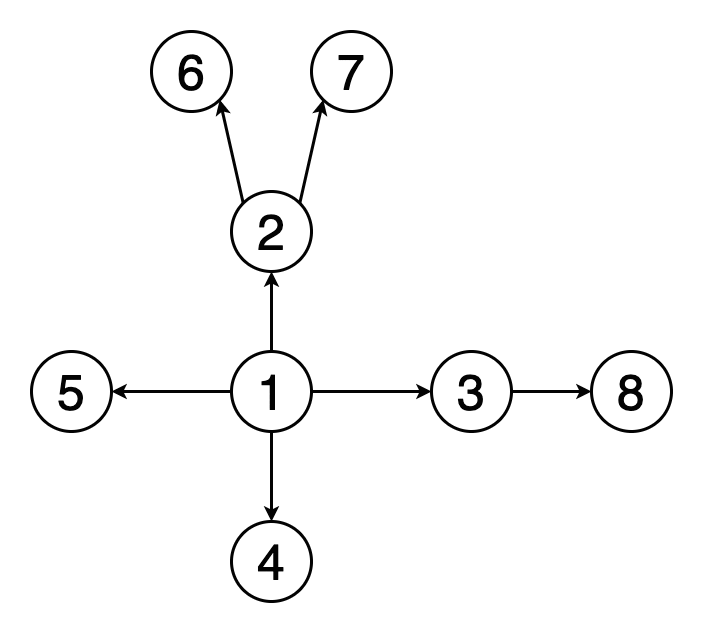

Типичные применения **обхода в глубину**:
- Топологическая сортировка
- Проверка графа на ацикличность
- Поиск компонент сильной связности
- Поиск мостов
- Поиск наименьшего общего предка
- Поиск любого пути в графе

# Проверка на цикличность

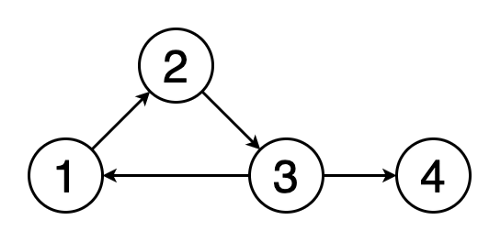

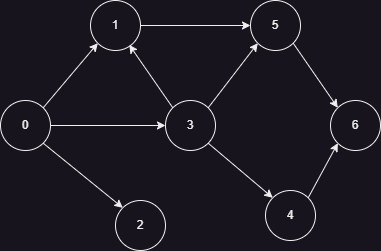
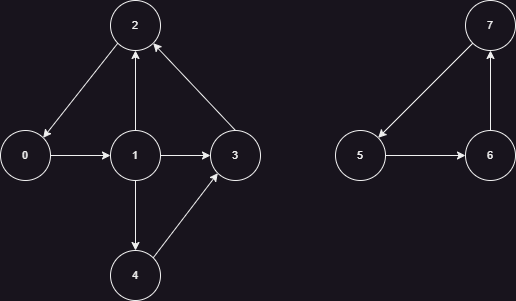

In [5]:
graph = [
    [1, 2, 3],
    [5],
    [],
    [1, 4, 5],
    [6],
    [6],
    []
    ]

In [6]:
graph_2 = [
    [1],
    [2, 3, 4],
    [0],
    [2],
    [3],
    [6],
    [7],
    [5]
    ]

In [7]:
colors = {}
def isCyclic(graph):
    colors.clear()
    def dfs(graph, node):
        colors[node] = "grey"
        for neighbour in graph[node]:
            if neighbour in colors.keys():
                if colors[neighbour] == "grey":
                    return True
                else:
                    continue
            if dfs(graph, neighbour):
                return True
        colors[node] = "black"
        return False
    for i in range(len(graph)):
        if dfs(graph, i):
            return True
    return False
            
                              

In [8]:
print(isCyclic(graph), isCyclic(graph_2))

False True


# Топологическая сортировка

Постановка задачи:<br>
Дан ориентированный граф с ```n``` вершинами и ```m``` рёбрами. Требуется перенумеровать его вершины таким образом, чтобы каждое рёбро вело из вершины с меньшим номером в вершину с большим.

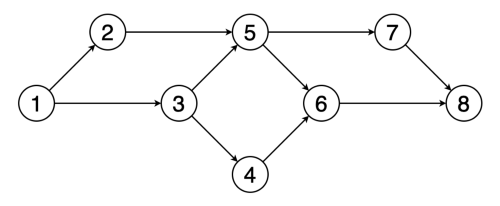

In [35]:
from collections import deque
result = deque()
def TopoSort(edge):
    if colors[edge] == "black":
        return
    if colors[edge] == "grey":
        return "NO"
    colors[edge] = "grey"
    for vertice in graph[edge]:
        TopoSort(vertice)
    colors[edge] = "black"
    result.appendleft(edge)

n = len(graph)
colors = ["white" for _ in range(n)]

for i in range(n):
    TopoSort(i)

print(*result)

0 3 4 2 1 5 6


# BFS

**Обходом в ширину** (breadth-first search, bfs) называют алгоритм обхода графов, при котором на каждой итерации обходимые вершины отстоят на равное расстояние от изначальной.

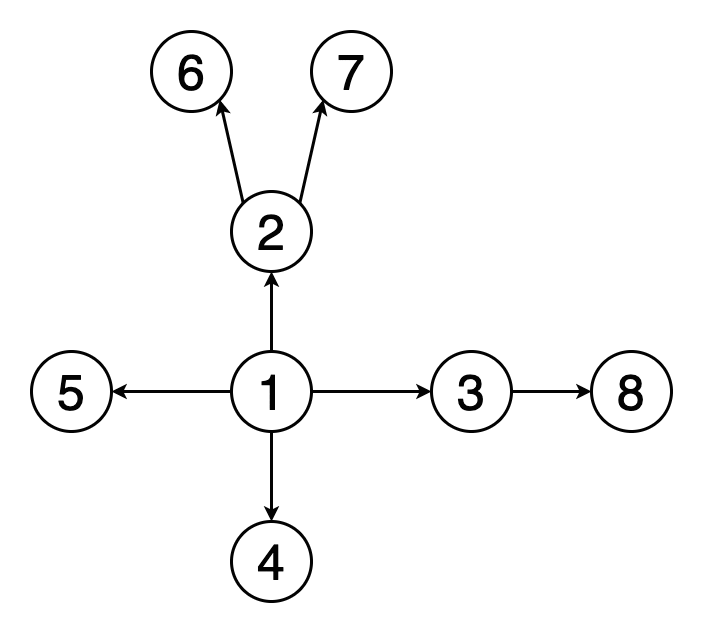

Типичные применения **обхода в ширину**:
- Поиск кратчайшего пути
- Поиск компонент связности
- Решения игр **с наименьшим числом ходов**
- Нахождение кратчайшего цикла

# Поиск длины кратчайшего пути (невзвешенный граф)

Предположим, что нам надо найти кратчайший путь из вершины ```0``` в вершину ```6```
Для простоты будем считать, что циклов в графе нет

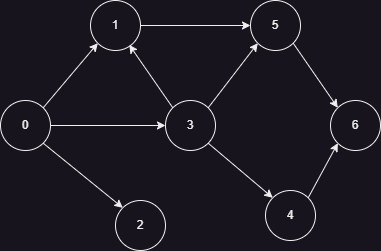

In [9]:
pLen = {0: 0}

def bfs_shortest_path(graph: list, start: int, end:int):
    queue = [start]
    while len(queue) > 0:
        cur = queue.pop(0)
        for neighbour in graph[cur]:
            if not (neighbour in pLen.keys()):
                queue.append(neighbour)
                pLen[neighbour] = pLen[cur] + 1
            else:
                pLen[neighbour] = min(pLen[neighbour], pLen[cur] + 1)  
                      
    return pLen[end] if end in pLen.keys() else -1    

In [10]:
bfs_shortest_path(graph, 0, 6)

3

In [26]:
pLen

{0: 0, 1: 1, 2: 1, 3: 1, 5: 2, 4: 2, 6: 3}

# Поиск компонент связности

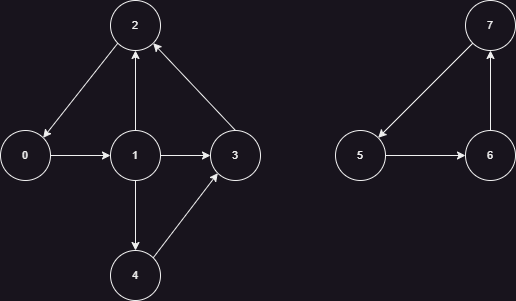

In [11]:
def find_connected(graph):
    subgraphs = []
    visited = set()
    for vertice in range(len(graph)):
        if vertice in visited:
            continue
        queue = [vertice]
        visited.clear()
        while len(queue) > 0:
            cur = queue.pop(0)
            for neighbour in graph[cur]:
                if not neighbour in visited:
                    queue.append(neighbour)
            visited.add(cur)
        subgraphs.append(visited.copy())
    return subgraphs

In [49]:
find_connected(graph_2)

[{0, 1, 2, 3, 4}, {5, 6, 7}]

# Поиск кратчайшего пути на графе

# Алгоритм Дейкстры

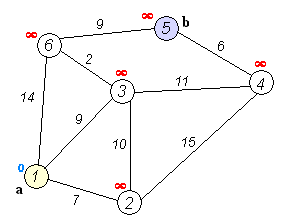

In [2]:
graph = [
    [(1, 7), (2, 9), (5, 14)],
    [(0, 7), (2, 10), (3, 15)],
    [(0, 9), (1, 10), (3, 11), (5, 2)],
    [(1, 15), (2, 11), (4, 6)],
    [(3, 6), (5, 9)],
    [(0, 14), (2, 2), (4, 9)]
]
n = len(graph)
s = 0
f = 4

In [4]:
import heapq

# инициализация массива расстояний и очереди с приоритетами
inf = float('inf')
dist = [inf] * n
dist[s] = 0
q = [(0, s)]

prev = {}

while q:
    # извлекаем вершину с наименьшим расстоянием
    d, u = heapq.heappop(q)
    if dist[u] < d:
        continue
    # обновляем расстояния до смежных вершин
    for v, w in graph[u]:
        if dist[u] + w < dist[v]:
            dist[v] = dist[u] + w
            heapq.heappush(q, (dist[v], v))
            # сохраняем информацию о предыдущей вершине для восстановления пути
            prev[v] = u
    # если достигли конечной вершины, завершаем поиск
    if u == f:
        break

# восстанавливаем кратчайший путь
path = [f]
while path[-1] != s:
    path.append(prev[path[-1]])
path.reverse()

print(path)

[0, 2, 5, 4]
